# **Semantik Vektor II : Word2Vec**
Topik : Politik, Ekonomi, Teknologi

> Sumber : www.jawapos.com
---
Clarisa Hasya Y - 1301174256



In [19]:
from glob import glob
import random
import matplotlib.pyplot as plt

# Import library untuk menampilkan pesan log proses
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# Import library gensim
from gensim import utils
# Import package untuk membangun model
import gensim.models
# inital reduction
from sklearn.decomposition import IncrementalPCA    
# final reduction
from sklearn.manifold import TSNE                   
# array handling
import numpy as np                                  

In [20]:
class MyCorpus(object): 
  """An interator that yields sentences (lists of str)."""

  def __iter__(self):
    list_of_files = glob('Full dataset-*.txt')
    for file_name in list_of_files:
      for line in open(file_name, 'r'):
        # assume there's one document per line, tokens separated by whitespace
        # asumsi 1 dokumen adalah 1 kalimat, dituliskan per baris. Antar token dipisahkan dengan spasi
        yield utils.simple_preprocess(line)

In [21]:
sentences = MyCorpus()
model1 = gensim.models.Word2Vec(sentences=sentences, min_count=1)
model5 = gensim.models.Word2Vec(sentences=sentences, min_count=5)

2020-10-08 08:34:14,967 : INFO : collecting all words and their counts
2020-10-08 08:34:14,973 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 08:34:15,026 : INFO : collected 5568 word types from a corpus of 26735 raw words and 1390 sentences
2020-10-08 08:34:15,027 : INFO : Loading a fresh vocabulary
2020-10-08 08:34:15,040 : INFO : effective_min_count=1 retains 5568 unique words (100% of original 5568, drops 0)
2020-10-08 08:34:15,041 : INFO : effective_min_count=1 leaves 26735 word corpus (100% of original 26735, drops 0)
2020-10-08 08:34:15,066 : INFO : deleting the raw counts dictionary of 5568 items
2020-10-08 08:34:15,067 : INFO : sample=0.001 downsamples 31 most-common words
2020-10-08 08:34:15,068 : INFO : downsampling leaves estimated 23846 word corpus (89.2% of prior 26735)
2020-10-08 08:34:15,085 : INFO : estimated required memory for 5568 words and 100 dimensions: 7238400 bytes
2020-10-08 08:34:15,086 : INFO : resetting layer weights
2

**Akses representasi vektor/embedding sebuah kata**

Model 1 (min_count = 1)

In [22]:
vec_positif1 = model1.wv['teknologi']
print('Akses representasi vektor/embedding kata teknologi pada model 1 (min_count = 1)')
print(vec_positif1)

Akses representasi vektor/embedding kata teknologi pada model 1 (min_count = 1)
[ 0.01125496  0.03743048 -0.03404335 -0.00228902 -0.00618799  0.03695581
 -0.00464145 -0.03732043 -0.05029126  0.03664695 -0.03527725  0.02155821
  0.00274584 -0.0601807  -0.01409196 -0.04891443 -0.03676495  0.01077561
  0.02605814 -0.01062427 -0.0310374  -0.02785234  0.0287791   0.01398404
  0.02462696  0.01608144  0.044616    0.03727058 -0.01865061  0.03773578
 -0.02159466 -0.03307237  0.08586337  0.02081238 -0.02885245 -0.01524289
  0.01723409  0.06327529 -0.02056803  0.02248769  0.02031251  0.00428529
  0.00259448  0.02398802  0.0037177  -0.04752226 -0.00817973 -0.02111755
 -0.0202548   0.02135962 -0.01074778  0.00497395 -0.02450091 -0.03053778
  0.04743185  0.00901399 -0.0142966   0.03522302  0.01181488  0.07131896
  0.01238678 -0.00411843  0.00642214  0.05089223 -0.03891737 -0.00777977
  0.00294412  0.00173972 -0.03087948 -0.0413373  -0.05280274  0.01640666
  0.00719909  0.00603738  0.01882495  0.0233

Model 2 (min_count = 5)

In [23]:
vec_positif5 = model5.wv['teknologi']
print('Akses representasi vektor/embedding kata teknologi pada model 2 (min_count = 5)')
print(vec_positif5)

Akses representasi vektor/embedding kata teknologi pada model 2 (min_count = 5)
[-0.01981586  0.17239878 -0.11172166 -0.00730954  0.05635959  0.20829268
  0.036265   -0.20329913 -0.2672934   0.2135133  -0.24426834  0.07807299
  0.01864818 -0.29080638 -0.06806487 -0.31282854 -0.14934742  0.02585593
  0.17756435 -0.10553381 -0.16021517 -0.06549942  0.15392382  0.06899372
  0.12497438  0.07405618  0.22811627  0.17232528 -0.03051454  0.1951806
 -0.11079609 -0.14863926  0.37460724  0.0831929  -0.20106941 -0.04947944
  0.01393325  0.29786974 -0.12177292  0.05814529  0.12557237  0.06161097
  0.06468142  0.15481822 -0.05003066 -0.28405145 -0.06618275 -0.09758516
 -0.11968511  0.09516328 -0.03122963  0.02763327 -0.125835   -0.139941
  0.30694908 -0.00381478 -0.06504061  0.13963836  0.10612023  0.2983999
  0.08003883 -0.05122527  0.09228753  0.23625569 -0.17634934 -0.09126654
  0.07506844  0.00039246 -0.12990192 -0.18938881 -0.27776116  0.14692205
  0.06682099  0.07077896  0.10361628  0.14115153

**Similarity Model 1 (min_count = 1)**

Similarity > 0,5

In [24]:
print('Similarity kata pemerintah & politik : ', model1.wv.similarity('pemerintah', 'politik'))

Similarity kata pemerintah & politik :  0.9854889


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0 < Similarity < 0,5

In [25]:
print('Similarity kata mengatur & harga : ', model1.wv.similarity('mengatur', 'harga'))
print('Similarity kata teknologi & telkomsel : ',model1.wv.similarity('teknologi', 'telkomsel'))

Similarity kata mengatur & harga :  0.5924793
Similarity kata teknologi & telkomsel :  0.8591957


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-1 < Similarity < -0,5

In [26]:
print('Similarity kata mengoptimalkan & news : ', model1.wv.similarity('mengoptimalkan', 'news'))
print('Similarity kata memanfaatkan & singapura : ', model1.wv.similarity('memanfaatkan', 'singapura'))

Similarity kata mengoptimalkan & news :  0.30720618
Similarity kata memanfaatkan & singapura :  0.8034695


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Similarity Model 2 (min_count = 5)**

Similarity > 0,5

In [27]:
print('Similarity kata pembangunan & kerja : ', model5.wv.similarity('pembangunan', 'kerja'))
print('Similarity kata pemerintah & politik : ', model5.wv.similarity('pemerintah', 'politik'))

Similarity kata pembangunan & kerja :  0.9997281
Similarity kata pemerintah & politik :  0.99897283


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0 < Similarity < 0,5

In [28]:
print('Similarity kata teknologi & telkomsel : ',model5.wv.similarity('teknologi', 'telkomsel'))
# print('Similarity kata mengatur & harga : ', model5.wv.similarity('digitalisasi', 'harga'))

Similarity kata teknologi & telkomsel :  0.99579495


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-1 < Similarity < -0,5

In [29]:
print('Similarity kata memanfaatkan & singapura : ', model5.wv.similarity('memanfaatkan', 'singapura'))
# print('Similarity kata mengoptimalkan & news : ', model5.wv.similarity('mengoptimalkan', 'news'))

Similarity kata memanfaatkan & singapura :  0.98809546


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Top-5 kata yang similar dengan sebuah kata tertentu**

Model 1 (min_count = 1)

In [30]:
print('Top 5 kata teknologi dengan sebuah kata tertentu pada model 1 (min_count = 1)')
print(model1.wv.most_similar(positive=['teknologi'], topn=5))

2020-10-08 08:34:17,769 : INFO : precomputing L2-norms of word weight vectors


Top 5 kata teknologi dengan sebuah kata tertentu pada model 1 (min_count = 1)
[('pada', 0.9942741394042969), ('saja', 0.994184672832489), ('untuk', 0.9940682649612427), ('dan', 0.9940444827079773), ('karena', 0.9940175414085388)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Model 2 (min_count = 5)

In [37]:
print('Top 5 kata teknologi dengan sebuah kata tertentu pada model 2 (min_count = 5)')
print(model5.wv.most_similar(positive=['teknologi'], topn=5))

Top 5 kata teknologi dengan sebuah kata tertentu pada model 2 (min_count = 5)
[('pada', 0.99977707862854), ('untuk', 0.9997696280479431), ('saja', 0.9997682571411133), ('dan', 0.9997658729553223), ('ini', 0.9997634887695312)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Reduksi dimensi**

In [32]:
# Fungsi untuk reduksi dimensi
def reduce_dimensions(model):
  num_dimensions = 2  # final num dimensions (2D, 3D, etc)

  vectors = [] # positions in vector space
  labels = [] # keep track of words to label our data again later
  for word in model.wv.vocab:
      vectors.append(model.wv[word])
      labels.append(word)

  # convert both lists into numpy vectors for reduction
  vectors = np.asarray(vectors)
  labels = np.asarray(labels)

  # reduce using t-SNE
  vectors = np.asarray(vectors)
  tsne = TSNE(n_components=num_dimensions, random_state=0)
  vectors = tsne.fit_transform(vectors)

  x_vals = [v[0] for v in vectors]
  y_vals = [v[1] for v in vectors]
  return x_vals, y_vals, labels


In [33]:
x_vals1, y_vals1, labels1 = reduce_dimensions(model1)
x_vals5, y_vals5, labels5 = reduce_dimensions(model5)

**Visualisasi embedding**

In [34]:
def plot_with_matplotlib(x_vals, y_vals, labels):
  random.seed(0)

  plt.figure(figsize=(12, 12))
  plt.scatter(x_vals, y_vals)

  # Label randomly subsampled 25 data points
  #
  indices = list(range(len(labels)))
  selected_indices = random.sample(indices, 25)
  for i in selected_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))

Model 1 (min_count = 1)

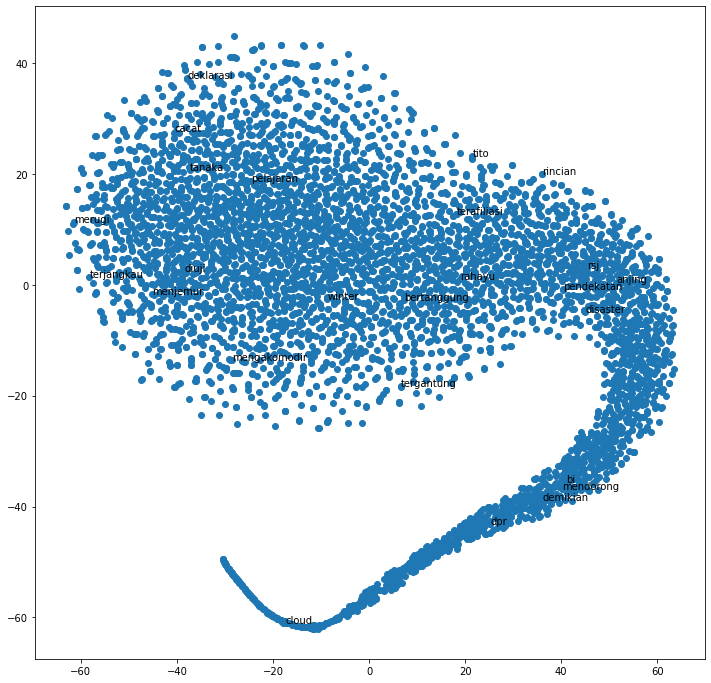

In [35]:
plot_with_matplotlib(x_vals1, y_vals1, labels1)

Model 2 (min_count = 5)

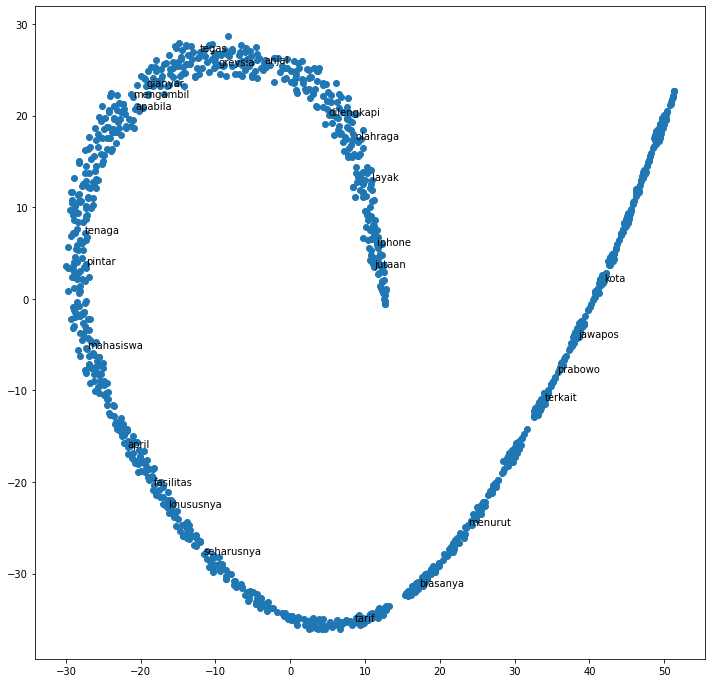

In [36]:
plot_with_matplotlib(x_vals5, y_vals5, labels5)